# NEWER UPDATE

# Femtosecond laser imaging photobleaching

## 1. Load the data and get to know it

When dealing with a new dataset, we need to ask these basic questions about the data:
- what is the data trying to describe?
- how was the data acquired?
- what were the conditions when data was acquired?
- what physical/chemical/... phenomena can affect the process of data acquisition?
- what types of questions need to be answered using this data?

Then after acquiring as much information about the data as possible, it's time to explore it ourselves! As "Scientists" we need to think critically about everything, especially the data that we acquire. There are ocassions in which the integrity, validity, interpretation, etc. are faulty and need to be revised.

In order to answer these questions it is usually necessary to thoughtfully analyze the data and have contact with the provider of the data along the way. Unfortunately, it is not feasible to contact the data providers for this lab, but it is still good practice to ask yourself (or your TAs) these questions as you continue with this analysis. Additionally, this lab will teach you how to engage with new and unfamiliar datasets; understanding the data that you have been provided, posing new questions, and finding the answers to these questions.

## Photobleaching
> [Photobleaching][1] refers to the photochemical alteration of a dye or a fluorophore molecule such that it is permanently unable to fluoresce.

The main aim of this homework is to observe, quantify and analyze an example of fluorophore bleaching. In this dataset, the bleaching is reflected as a decrease in the intensity of the pixels.

[1]: https://en.wikipedia.org/wiki/Photobleaching

### 1.2 Load the data

Load the data and retrieve the `femtosecond laser data` from the data file.

In [62]:
from h5py import File as h5File
with h5File("FemtosecondLaser_1.h5") as file:
    img_femtolaser = file['data'][:]

In [63]:
print( "type of the `file` object:", type(file) )
print( "shape/dimensions of the data:", img_femtolaser.shape )  # shape = ( timestamps, width of the image, height of the image )
print( "pixel value at time index `10`, width index `50` and height index `75`: ", img_femtolaser[10,50,75] )
print( "pixel values at during time index `5` through `10`, width index `50` and `55`, and height index `75` and `80`: ", img_femtolaser[5:10,50:55,75:80] )

type of the `file` object: <class 'h5py._hl.files.File'>
shape/dimensions of the data: (81, 447, 447)
pixel value at time index `10`, width index `50` and height index `75`:  0.0
pixel values at during time index `5` through `10`, width index `50` and `55`, and height index `75` and `80`:  [[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


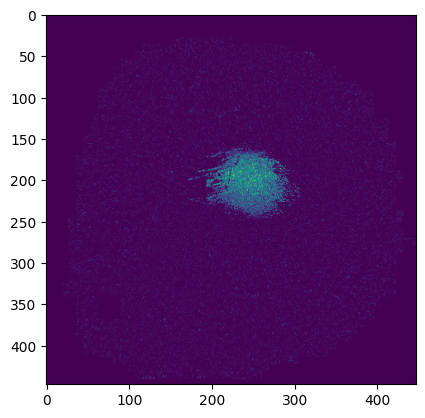

In [64]:
# Q1.2.1: plot first and last frames, e.g. img_femtolaser[0,:,:] is the first frame
# Hint1: use the plotting function `matplotlib.pyplot.imshow` from `matplotlib` module (documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
# Hint2: use the arguments `vmin=0` and `vmax=1` to avoid automatic adjustment of brightness by matplotlib
import matplotlib.pyplot as plt
plt.imshow(img_femtolaser[0,:,:], vmin = 0, vmax = 1)

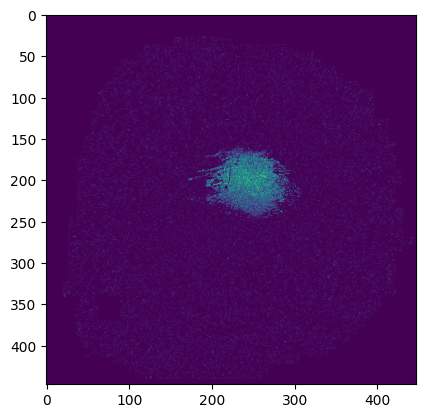

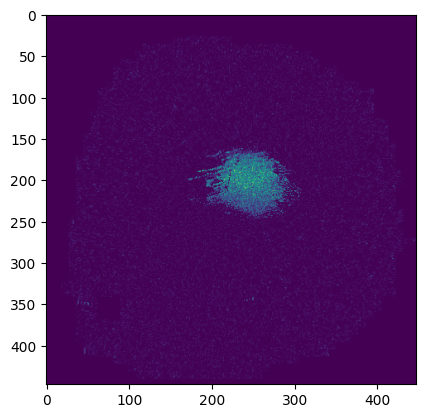

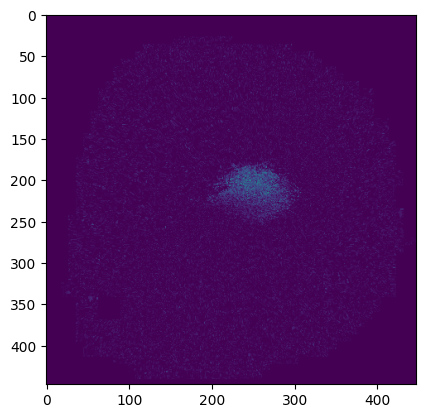

In [65]:
# Q1.2.2: plot a few more frames to show photobleaching over time
plt.imshow(img_femtolaser[10,:,:], vmin = 0, vmax = 1)
plt.show()
plt.imshow(img_femtolaser[50,:,:], vmin = 0, vmax = 1)
plt.show()
plt.imshow(img_femtolaser[70,:,:], vmin = 0, vmax = 1)
plt.show()

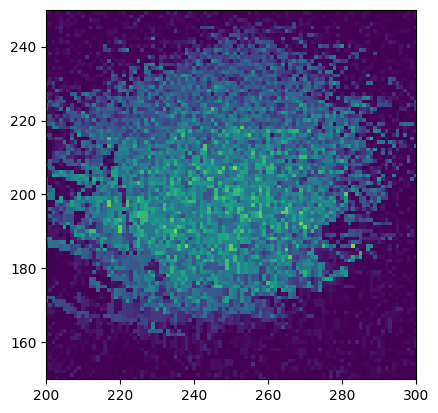

In [66]:
# Q1.2.3: can we use a smaller region in each frame/image to extract brightness and observe bleaching?
plt.imshow(img_femtolaser[0,:,:], vmin = 0, vmax = 1)
plt.xlim(200,300)
plt.ylim(150,250)
plt.show()

### 1.3 Noise in the data
Arrays of sensors in the cameras can record random noise due to a multitude of sources, [Image Noise - Types][6]. In this dataset the noise is independent and sparse. One method to reduce this type of noise is blurring or spatial-smoothing. Within this category of blurring there are mutliple different approaches: replace every pixel by the average of surrounding pixels (e.g. [8-connectivity][1]), more continuous blurring methods, e.g. [Gaussian Blur][2], more statistically robust blurring methods, e.g. [Median Filtering][3].

We will use a less aggressive blurring by applying [Box Averaging][4] of size (3,3) to all the frames.

```python
import cv2 as cv  # OpenCV Version at 2023/07/06
# Do not use `cv.imshow` for this tutorial and in this notebook
```

[1]: https://en.wikipedia.org/wiki/Pixel_connectivity#8-connected
[2]: https://en.wikipedia.org/wiki/Gaussian_blur
[3]: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9
[4]: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37
[5]: https://pypi.org/project/opencv-python/
[6]: https://en.wikipedia.org/wiki/Image_noise#Types

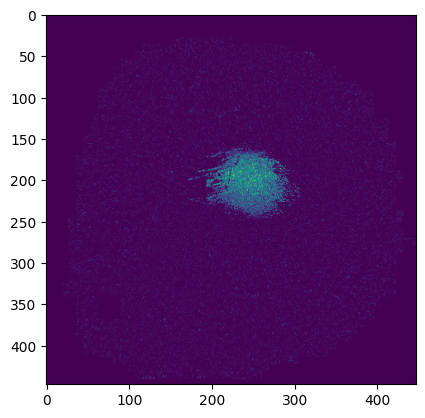

In [67]:
# Q1.3.1: plot the first frame to have it here as a reference for comparison
plt.imshow(img_femtolaser[0,:,:], vmin= 0, vmax=1)

In [68]:
# Q1.3.2: apply a box blur of size (3,3) on the first frame and plot it
# hint: box blur is available as a function in the `cv` module -> `cv.blur` (documentation: Image Blurring section at https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)
import cv2 as cv
img_femtolaser_blur = cv.blur(img_femtolaser, (3,3))


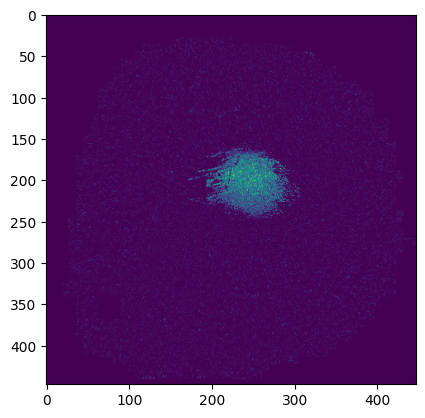

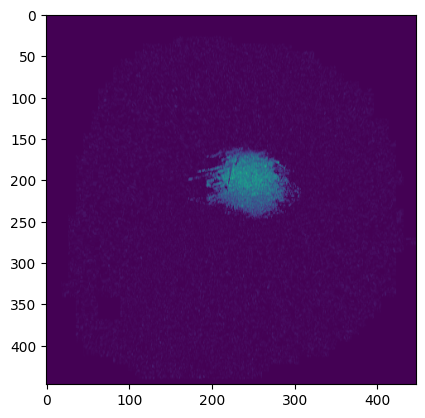

'we need a blurred image because it filters out noise'

In [69]:
# Q1.3.3: compare the blurred with the original first frame qualitatively
# Although the pictures/plots look similar, it is important to use the blurred version. Explain why this is so.
plt.imshow(img_femtolaser[0,:,:], vmin= 0, vmax=1)
plt.show()
plt.imshow(img_femtolaser_blur[0,:,:], vmin= 0, vmax=1)
plt.show()
"""we need a blurred image because it filters out noise"""

In [70]:
# Q1.3.4: apply the blurring in a for loop and store the blurred frames in a new array of the same shape of `img_femtolaser`
# name the blurred array `img_femtolaser_blurred`
# Hint1: if you use a list to store frames, don't forget to convert to numpy arrays again, e.g. np.array(LIST_VARIABLE)
import numpy as np

img_femtolaser_blurred = [cv.blur(img, (3,3)) for img in img_femtolaser]

> We will cary out the rest of the analysis only using the `img_femtolaser_blurred` image frames.

## 2. Localize the cell
Now that we've taken a look at the original and done some blurring (e.g. spatial smoothing) to the images, it's time to localize the cell's bright spot. For the sake of analyzing the bleaching effect, we need to identify some region inside the cell and track it's brightness properties throughout the imaging session.

We will use a fixed mask over multiple time frames to extract both spatial and temporal variations in pixel intensities within the region of interest inside the cell.

### 2.1 Mask a specific region in all frames
By looking at frames at multiple times, we will define a mask that corresponds to bright regions inside the cell. This region should be small enough to ignore dark regions outside or on the boundary of the cell, while still large enough to capture some spatial variations inside the cell (possibly due to inevitable imaging noises).

After that, we will define and quantify statistics which capture the behavior of bleaching over time.

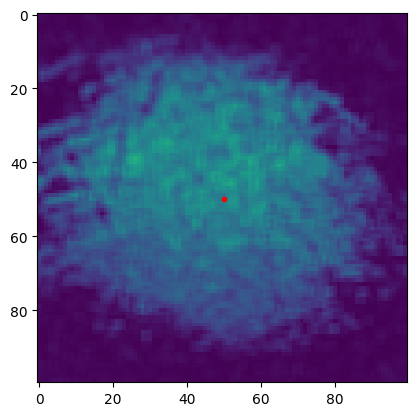

In [71]:
# Q2.1.1 find a fixed point that is within a bright region inside the cell. As the cell shifts slightly through time, check that the point you picked never contains background values. Do this qualitatively by looking at multiple frames.
# Plot multiple frames with some annotation around your fixed point, e.g. add a red dot on multiple frames
# Store the coordinates of the point in two variables `idx_i` and `idx_j`
idx_i, idx_j = (205, 250)
plot_range = 50
plt.imshow(img_femtolaser_blurred[0][idx_i-plot_range:idx_i+plot_range,idx_j-plot_range:idx_j+plot_range], vmin= 0, vmax=1)
plt.plot(plot_range,plot_range, 'r.')
plt.show()
img_femtolaser_blurred_masked = img_femtolaser_blurred


[Image Masking][1] refers to the process of selectively setting some pixel values in an image to zero, and keeping other pixels unchanges. Based on the visual of different frames, we can determine a True/False mask (2-dimensional array) that corresponds to a region inside the cell across all the frames.

[1]: https://homepages.inf.ed.ac.uk/rbf/HIPR2/mask.htm

In [72]:
# Q2.1.2 Now define a 2d-array which corresponds to a region around the point you found before
# e.g. this array should have `False` value outside the desired region and `True` inside
# You can visualize this mask using the hints in the next cell.
# Hint1: The size of the circle will determine the reliability of your final conclusions. Be intentional when choosing the size of your region

ni, nj = img_femtolaser_blurred[0].shape
radius = 10 # Students will be changing this parameter
mask_cell = np.zeros((ni, nj), dtype=np.bool_)
for i in range(ni):
    for j in range(nj):
        # Define a ciruclar region
        r = np.sqrt( (i-idx_i)**2 + (j - idx_j)**2 )
        if r <= radius:
            mask_cell[i,j] = True
n_pixels_mask = mask_cell.sum()   # Number of pixels inside the selected region

Text(0.5, 1.0, 'Last Frame with Mask')

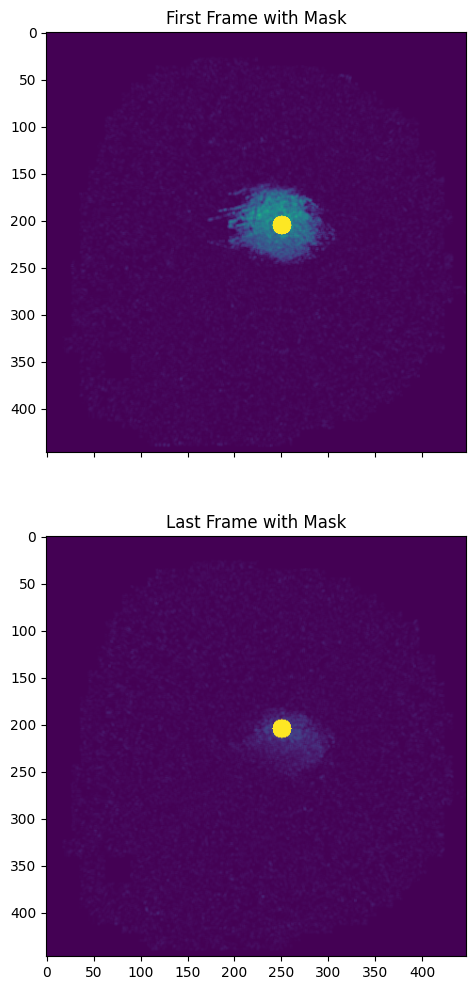

In [73]:
# Q2.1.3: plot the mask on top of each image for both first and last frame in a joint plot, e.g top image corresponds to first frame with mask annotated, and bottom image corresponds to the last frame with mask annotated
# you can use `matplotlib.pyplot.subplots` to create a joint/subplots.  (documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
# Hint1: you can easily make the masked region visible by adding it to an image before plotting, e.g. plt.imshow(img+mask_cell, vmin=0, vmax=1)
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,12), sharex=True)

ax1.imshow(img_femtolaser_blurred[0]+mask_cell, vmin=0, vmax=1)
ax1.set_title('First Frame with Mask')
ax2.imshow(img_femtolaser_blurred[-1]+mask_cell, vmin=0, vmax=1)
ax2.set_title('Last Frame with Mask')


In [74]:
# Q2.1.4: extract all pixel intensities inside the cell mask you have defined, e.g. for an image frame img[mask_cell]
# Create an array named 'intensities' of the shape (NUMBER_OF_FRAMES, n_pixels_mask) and populate it with pixel intensities for each frame

n_frames = len(img_femtolaser_blurred)
intensities = np.zeros((n_frames, n_pixels_mask))
for t in range(n_frames):
    intensities[t,:] = img_femtolaser_blurred[t][mask_cell]


### 2.2 Find the bleaching start time
In this dataset, the bleaching does not start from the initial frame. To focus on the analysis of bleaching dynamics, we first limit intensities to frame indices after the bleaching has started.

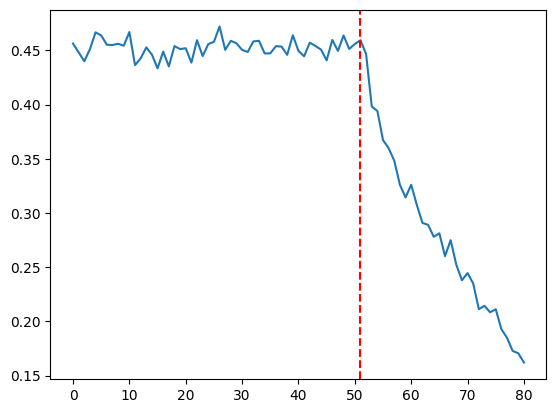

In [75]:
# Q2.2.1 Plot the average intesity at each time/frame index, and, using the plot, find the time index at which the bleaching has started
# Call this index `idx_bleaching_begin` and annotate it on the plot with a red vertical line
avg_intensity = intensities.mean(axis=1)
plt.plot(avg_intensity)
idx_bleaching_begin = 51
plt.axvline(x=idx_bleaching_begin, color='r', linestyle='--')
plt.show()


In [76]:
# Re-define the variable `intensities` as follows `intensities = intensities[idx_bleaching_begin:]`
# Run this only after you have finalized the value of `idx_bleaching_begin`
intensities = intensities[idx_bleaching_begin:]
# temp_list = temp_list[idx_bleaching_begin:]

# 3. Fit exponential funcion

We want to analyze the dependence of intensities vs. time. Our guess is that the dependence should be `exponentially decaying`. To estimate the exponential dependence we will use the Ordinary Least Squares method. 

### 3.1 Aggregate intensities

First we will define a time index array to represent the time at each frame. Then for each frame, we will aggregate the pixel intensities into two statistical groups which represent average behavior and it's uncertainty respectively.

In [77]:
# Q3.1.1: Calculate average and standard error of the masked pixel intensities (`intensities`). 
# At each frame store your final results as `intensities_mu` and `intensities_ste` as averages and standard errors respectively
n_times, n_pixels_mask = intensities.shape
ts = np.arange(n_times)
intensities_mu, intensities_ste = np.zeros(n_times), np.zeros(n_times)
for idx in range(n_times):
    pixel_values = intensities[idx]
    # Calculate mean and ste of the pixel values and store them
    # in `intensities_mu` and `intensities_ste` arrays

In [78]:
# Q3.1.2: create an error bar plot of `intensities_mu` and errors `intensities_ste` vs `ts` (documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)

### 3.2 Best exponential fit using Ordinary Least Squares method

Let's find the best exponential fit parameters using the [Ordinary Least Squares method][1]. The function [scipy.optimize.curve_fit][2] is already written to perform this for us. 

[1]: https://byjus.com/maths/least-square-method/#:~:text=The%20least%20square%20method%20is,the%20points%20from%20the%20curve.
[2]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html


In [79]:
# Q3.2.1: define a function in python that given `t`, `A` and `beta`, returns `A*exp(-beta*t)`.
# Name this function `func_exp`.
# For example this is how to use the function to calculate `1.2 * exp(-2.0*0.1)` (A = 1.2, beta = 2.0, t = 0.1): `func_exp(0.1, 1.2, 2.0)` this should return the value of `1.2 * exp(-2.0*0.1)`.
def func_exp(t, A, beta):
    # Your code

SyntaxError: incomplete input (1078269349.py, line 5)

In [ ]:
# Q3.2.2: following the documentation of `scipy.optimize.curve_fit`, and using `func_exp` and `intensities_mu`,
# find best exponential fit parameters using Ordinary Least Squares.
# Name these parameters `A_ols` and `beta_ols` and print them.
# Hint: you might need to use the argument `p0` explicitly

In [ ]:
# Q3.2.4: plot the error bar for `intensities_mu` vs `ts` (errors equal to `intensities_ste`), and
# add best fit exponentials using parameters from OLS